In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.info()
# age, attrition,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
print(df.describe(include='object'))
print(df.describe())
# Over18 and EmployeeCount seems somewhat useless column with only value for each row

       Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054  
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165         

In [4]:
df.duplicated().sum()
# just in case

0

In [5]:
df = df.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1)

<ipython-input-8-900b58267aa4>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2][1].set_xticklabels(axis[2][1].get_xticklabels(), rotation=45)


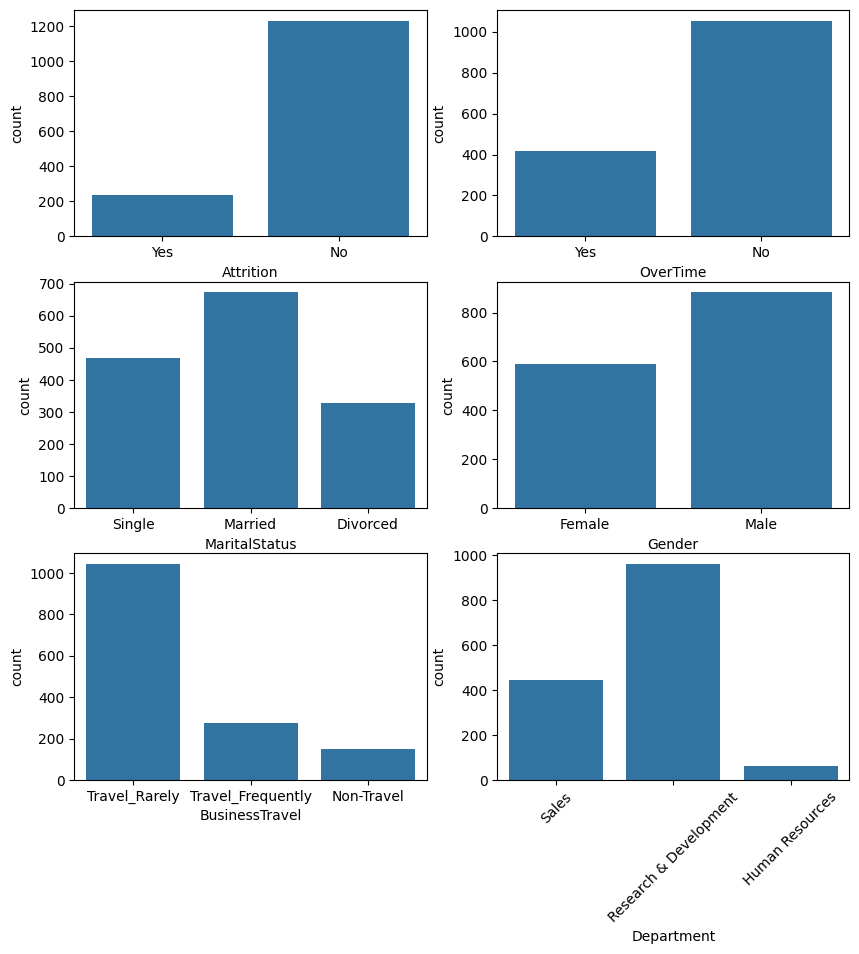

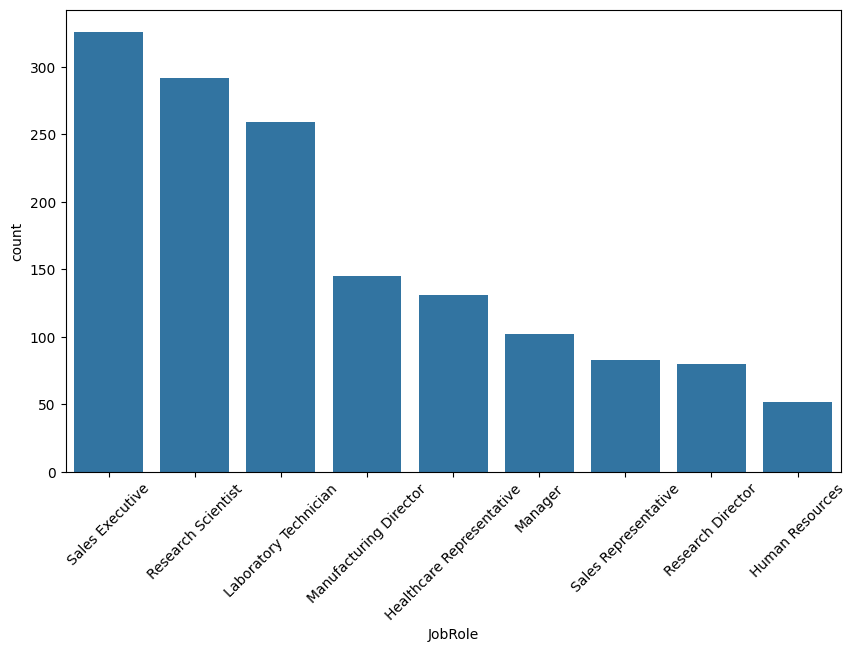

In [8]:
fix, axis = plt.subplots(3, 2, figsize=(10, 10))
sns.countplot(x='Attrition', data=df, ax=axis[0][0])
sns.countplot(x='OverTime', data=df, ax=axis[0][1])
sns.countplot(x='MaritalStatus', data=df, ax=axis[1][0])
sns.countplot(x='Gender', data=df, ax=axis[1][1])
sns.countplot(x='BusinessTravel', data=df, ax=axis[2][0])
sns.countplot(x='Department', data=df, ax=axis[2][1])
axis[2][1].set_xticklabels(axis[2][1].get_xticklabels(), rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', data=df)
plt.xticks(rotation=45)
plt.show()

At a glance, the majority of employees are not affected by attrition. However, based on initial distribution patterns, attrition may appear more common among employees who:
Work overtime,

1.   Work Ovetime
2.   Are divorced
3.   Rarely travel for business
4.   Belong to the HR department
5.   Female

Since attrition itself is a minority occurrence, it seems more prevalent in groups that are also minorities within their respective categories. Further analysis is needed to confirm these observations.

In [9]:
from sklearn.preprocessing import LabelEncoder
df_e = df.copy()

label_encoder = LabelEncoder()
for col in df_e.select_dtypes(include=['object']).columns:
    df_e[col] = label_encoder.fit_transform(df_e[col])
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col} Mapping: {mapping}")


Attrition Mapping: {'No': 0, 'Yes': 1}
BusinessTravel Mapping: {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Department Mapping: {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
EducationField Mapping: {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Gender Mapping: {'Female': 0, 'Male': 1}
JobRole Mapping: {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
MaritalStatus Mapping: {'Divorced': 0, 'Married': 1, 'Single': 2}
OverTime Mapping: {'No': 0, 'Yes': 1}


In [10]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['MonthlyIncome', 'Age', 'DistanceFromHome']
scaler = StandardScaler()
df_e[numerical_features] = scaler.fit_transform(df[numerical_features])

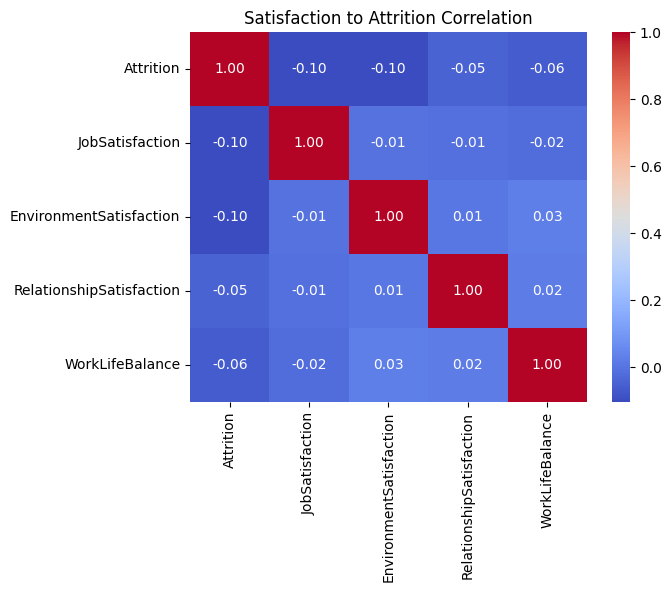

In [13]:
corr = df_e[['Attrition', 'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Satisfaction to Attrition Correlation')
plt.show()

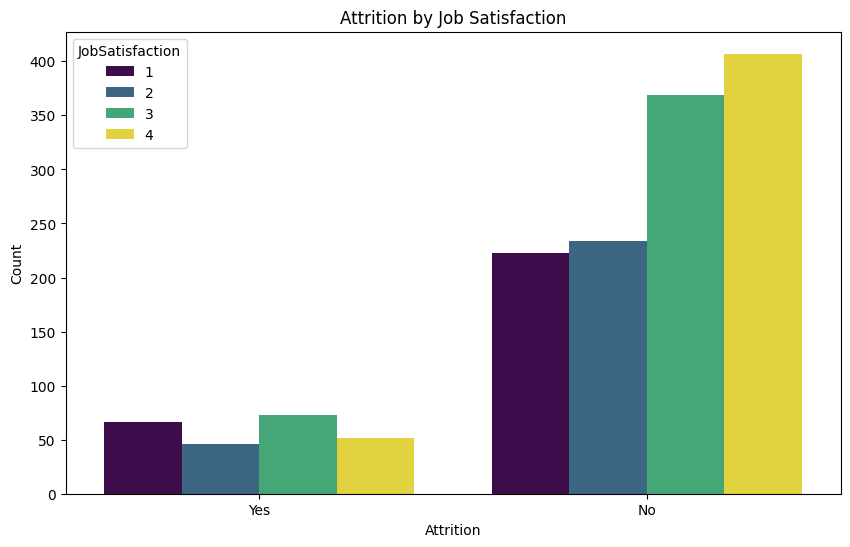

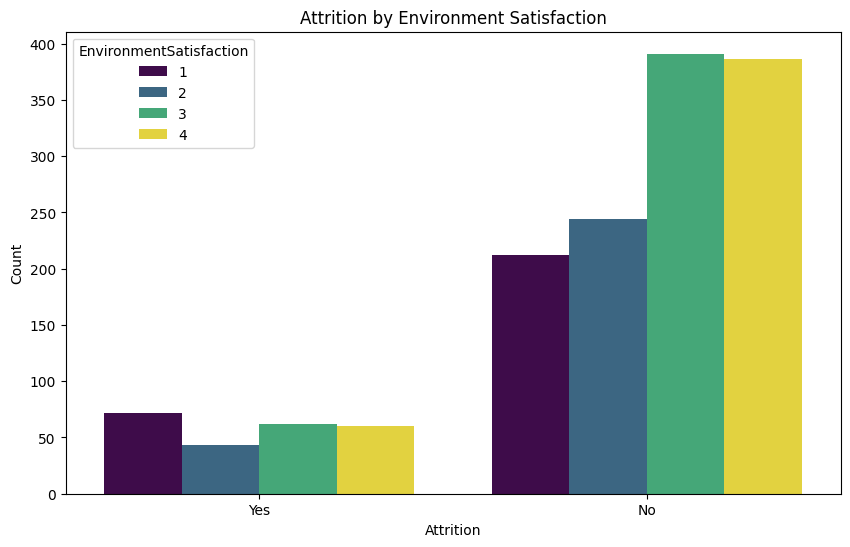

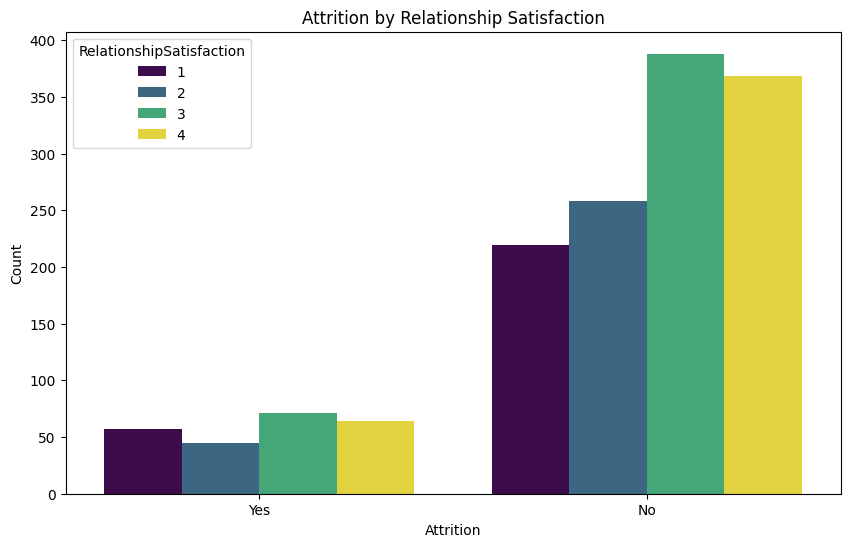

Text(0.5, 0, 'Attrition')

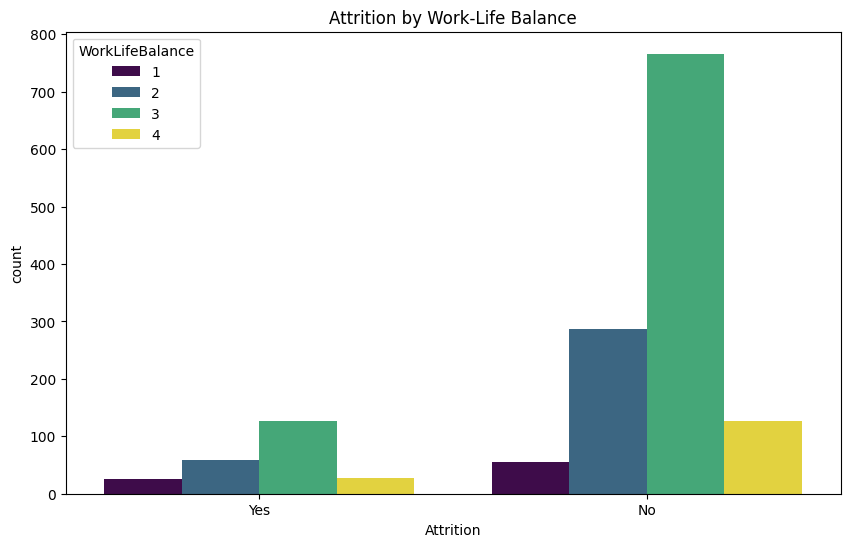

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', hue='JobSatisfaction', data=df, palette='viridis')
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', hue='EnvironmentSatisfaction', data=df, palette='viridis')
plt.title('Attrition by Environment Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', hue='RelationshipSatisfaction', data=df, palette='viridis')
plt.title('Attrition by Relationship Satisfaction')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', hue='WorkLifeBalance', data=df, palette='viridis')
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Attrition')

It can be argued that number of those whose satisfaction are 3 or 4 represent around 75% of those who aren't affected by attrition but considering heatmap that didn't show clear correlations I'd say we can't really rely on that, especially since those who affected by it are distributed mostly equally across levels of satisfaction


Work-life balance appear to have similiar distribution between those who are affected by attrition and those who aren't therefore as for now I observe no correlation between these two

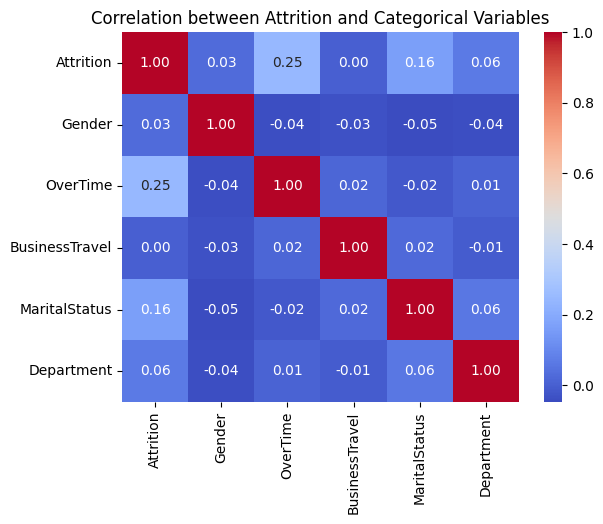

In [16]:
corr = df_e[['Attrition', 'Gender', 'OverTime', 'BusinessTravel', 'MaritalStatus', 'Department']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Attrition and Categorical Variables')
plt.show()

So still no noticable correlation however this time we can notice to weak positive correlations of Attrition to OverTime, also Attrition to  MaritalStatus possible(needs further analysis) very weak but still.

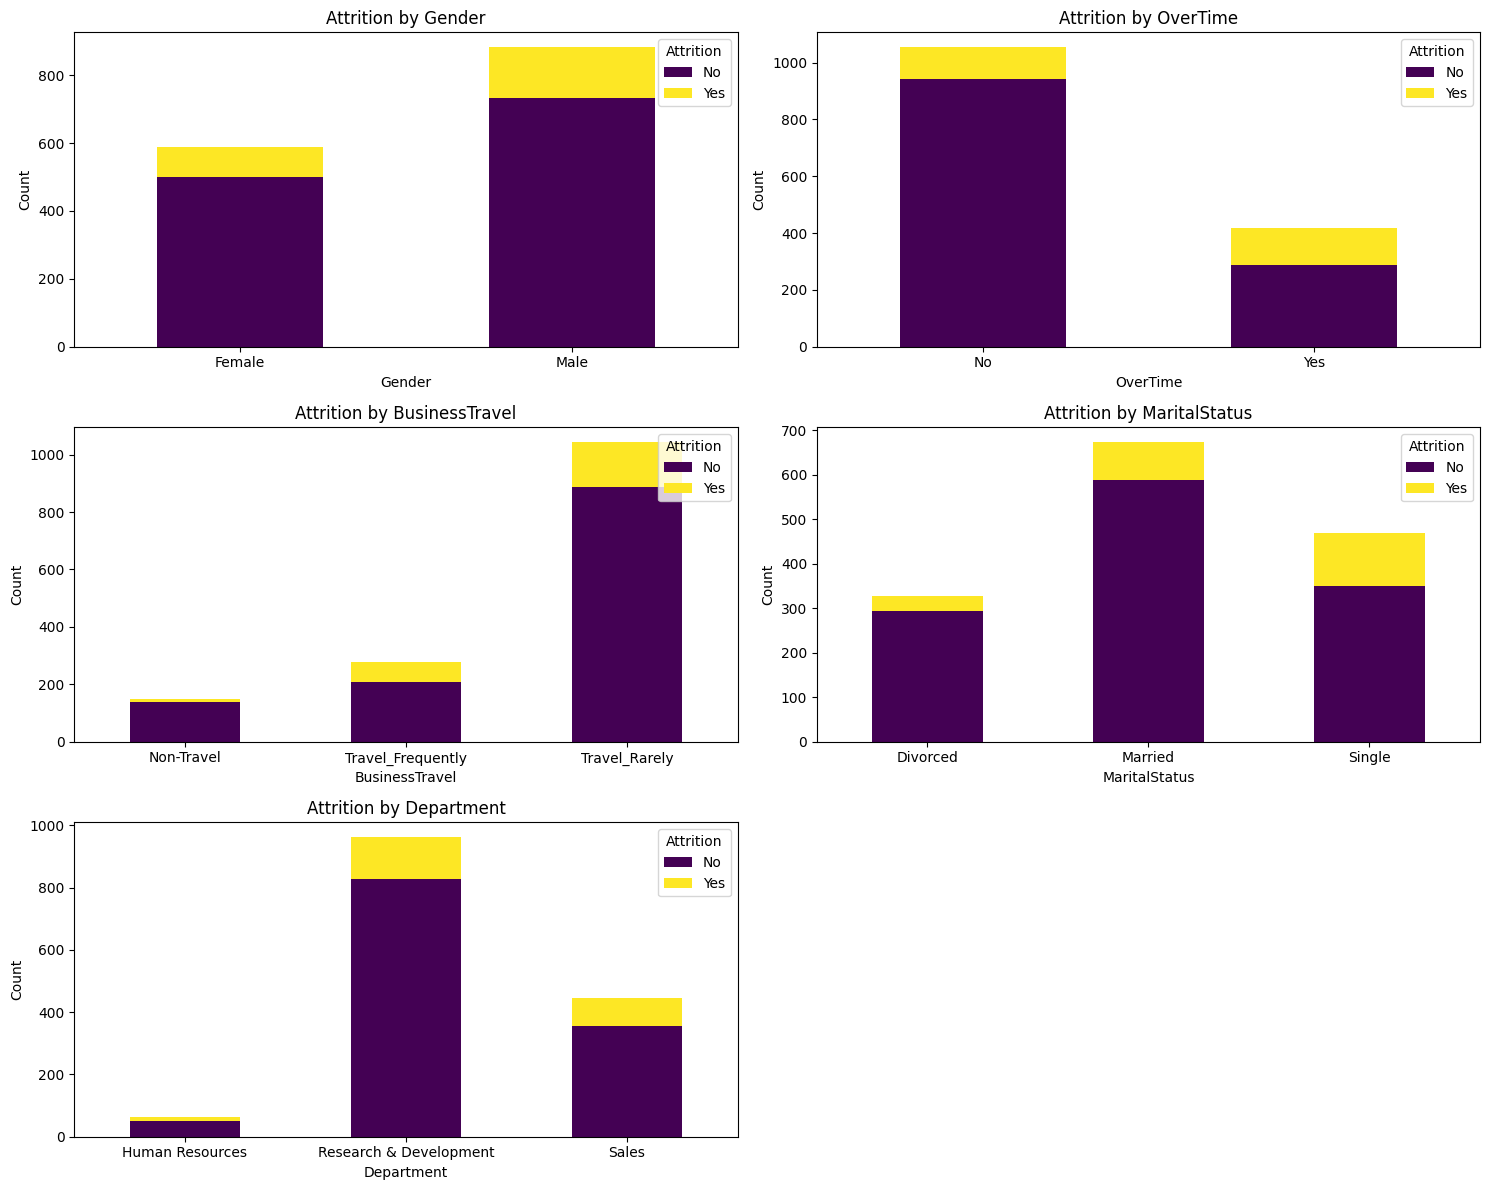

In [17]:
cols = ['Gender', 'OverTime', 'BusinessTravel', 'MaritalStatus', 'Department']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()
for ax, col in zip(axes, cols):
    crosstab = pd.crosstab(df[col], df['Attrition'])
    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
    ax.set_title(f'Attrition by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(title='Attrition', loc='upper right')

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Okay, with this we can confirm that OverTime indeed, even if weak, correlation with Attrition as even if there're less employees with overtime, the amount of those affected by attrition is slightly higher than out of those who don't work overtime.
Also we can see that single employees are affected by attrition more than those who are married and, suprisingly, those who are divorced. We can confirm that there's also a tendency that single workers are more likely to be affected by attrition.
In both cases it's likely to be a part of causation of attrition.

OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

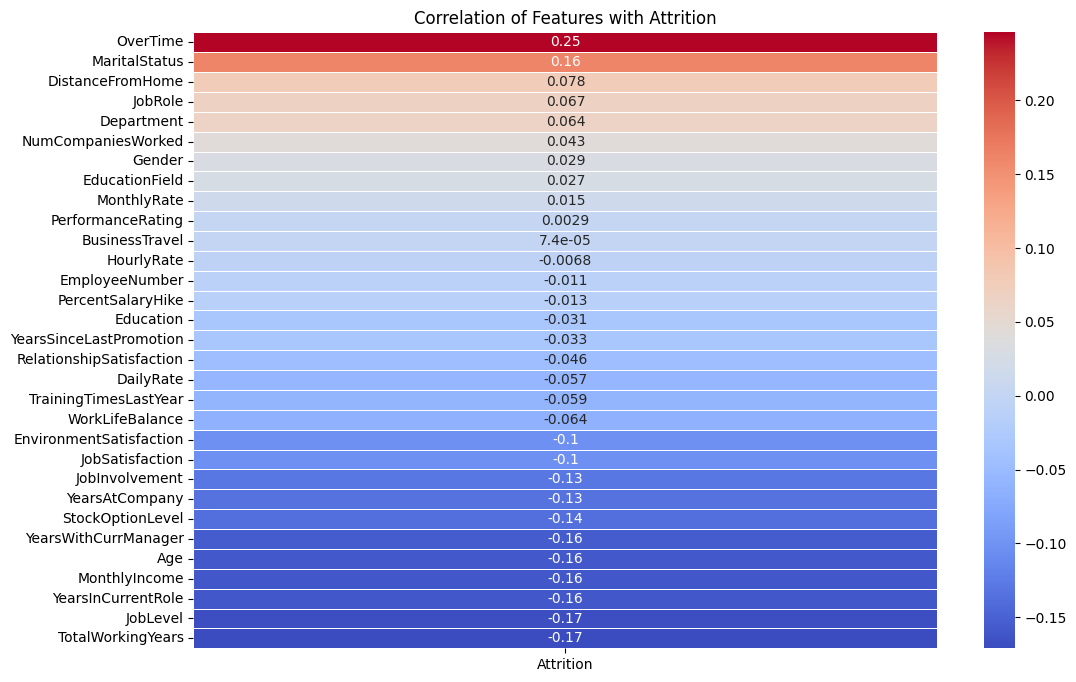

In [19]:
correlations = df_e.corr()['Attrition'].drop('Attrition').sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Attrition')
plt.show()
# at this point I just wasn't sure anymore whas could correlate with Attrition(as I found out reason was that dataset was synthetically generated) so I went to see all correlations
# sould've done this from the beginning

No new positive correlations however we can see some weak negative correlations:
1. Working Years
2. Job Level
3. Years in current Role
4. Age
5. Years with current Manager

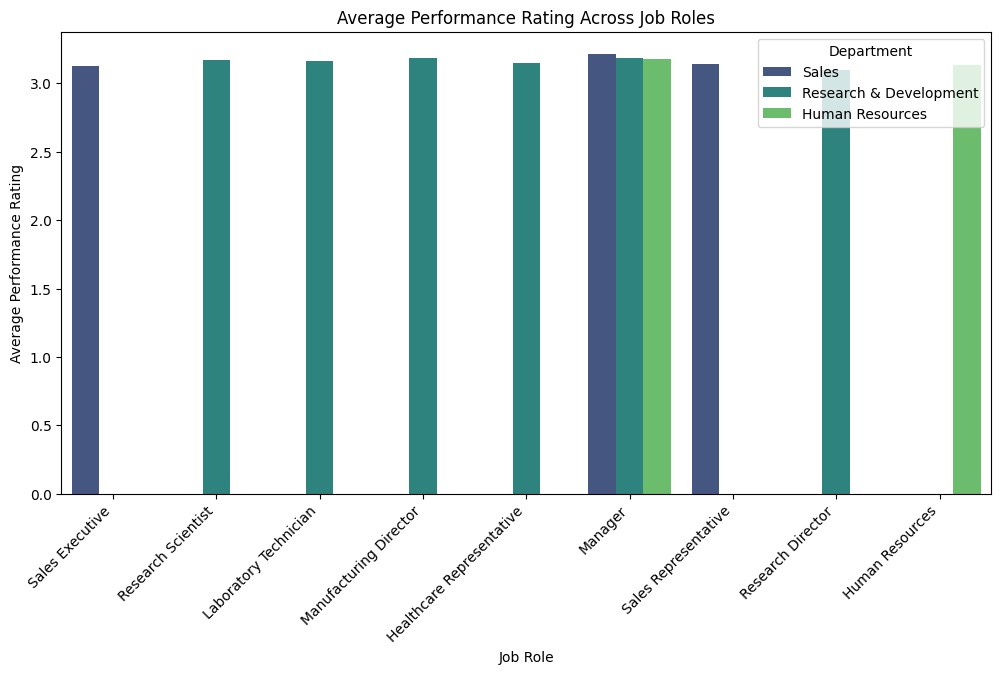

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='JobRole', y='PerformanceRating', estimator='mean', errorbar=None, hue = 'Department', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Performance Rating Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Average Performance Rating')
plt.show()

Performance doesn't change much across departments and different job roles...

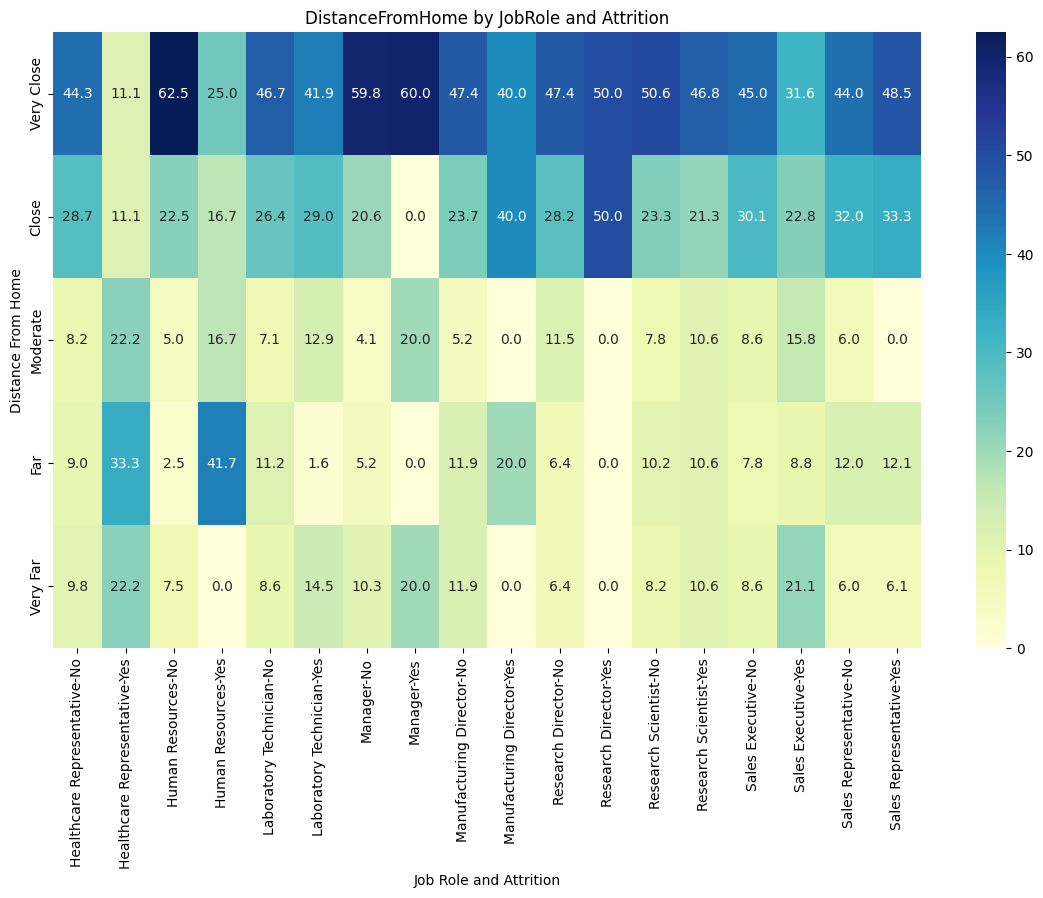

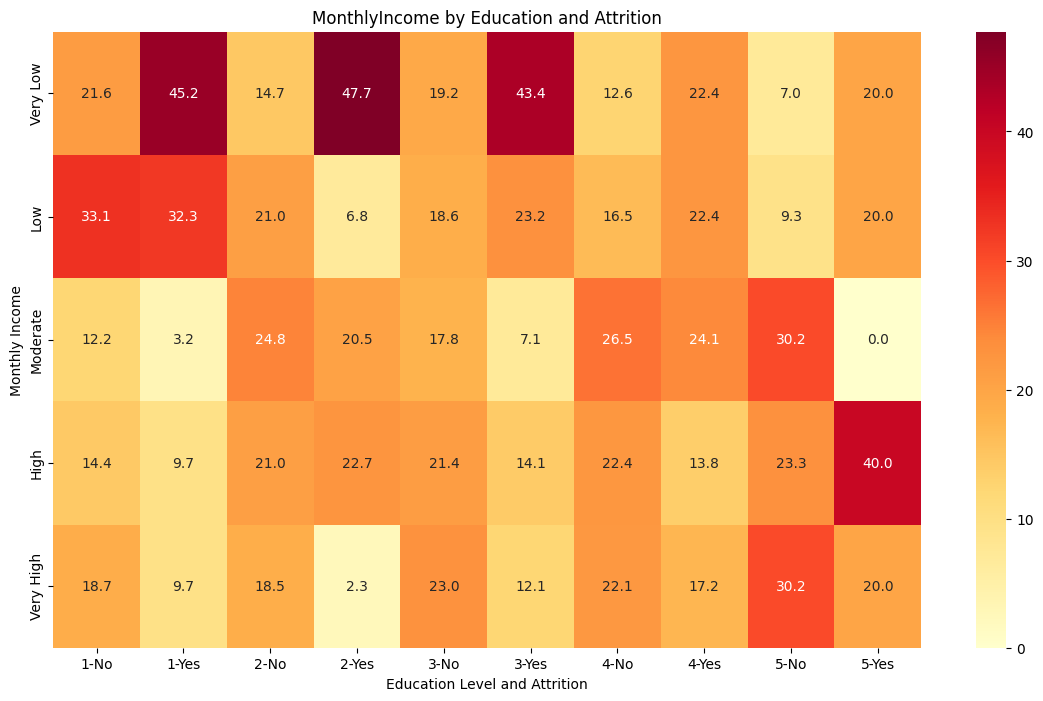

In [21]:
df['DistanceFromHome_Bins'] = pd.cut(df['DistanceFromHome'], bins=5, labels=['Very Close', 'Close', 'Moderate', 'Far', 'Very Far'])
cross_tab_1 = pd.crosstab(df['DistanceFromHome_Bins'], [df['JobRole'], df['Attrition']], margins=True)
cross_tab_1_percentage = cross_tab_1.div(cross_tab_1.iloc[-1, :], axis=1).iloc[:-1, :-1] * 100

plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab_1_percentage, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('DistanceFromHome by JobRole and Attrition')
plt.ylabel('Distance From Home')
plt.xlabel('Job Role and Attrition')
plt.show()

df['MonthlyIncome_Bins'] = pd.qcut(df['MonthlyIncome'], q=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
cross_tab_2 = pd.crosstab(df['MonthlyIncome_Bins'], [df['Education'], df['Attrition']], margins=True)
cross_tab_2_percentage = cross_tab_2.div(cross_tab_2.iloc[-1, :], axis=1).iloc[:-1, :-1] * 100


plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab_2_percentage, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title('MonthlyIncome by Education and Attrition')
plt.ylabel('Monthly Income')
plt.xlabel('Education Level and Attrition')

plt.show()

For Distance From Home:
We can notice that Healthcare Representatives and Human Resources employees who are affected by attrition tend to live far from their workplace, however HR who live very far, unlike previous group do not show attrition.
Research Directors show an interesting tendency where subject of attrition live close or very close, while those who live in moderate distance or even farther do not.

For education:
Employees with low education levels who are affected by attrition tend to fall predominantly into the low-income groups. At first glance, a similar pattern might seem to apply to high-education employees with high income, but their income distribution is actually more evenly spread across different levels, except for the Moderate Income bracket, which has fewer attrition cases.

On the other hand, employees with higher education who are not affected by attrition tend to cluster around Moderate and Higher income levels. This suggests that higher education paired with higher income may act as a protective factor against attrition, reducing the likelihood of employees leaving.



PercentSalaryHike           0.773550
YearsInCurrentRole          0.034986
DistanceFromHome            0.027110
YearsWithCurrManager        0.022827
YearsSinceLastPromotion     0.017896
TotalWorkingYears           0.006744
MaritalStatus               0.005207
OverTime                    0.004369
StockOptionLevel            0.003506
YearsAtCompany              0.003435
Attrition                   0.002889
WorkLifeBalance             0.002572
JobSatisfaction             0.002297
Age                         0.001904
DailyRate                   0.000473
HourlyRate                 -0.002172
EducationField             -0.005614
MonthlyRate                -0.009811
Gender                     -0.013859
NumCompaniesWorked         -0.014095
TrainingTimesLastYear      -0.015579
MonthlyIncome              -0.017120
EmployeeNumber             -0.020359
JobLevel                   -0.021222
JobRole                    -0.024233
Education                  -0.024539
Department                 -0.024604
B

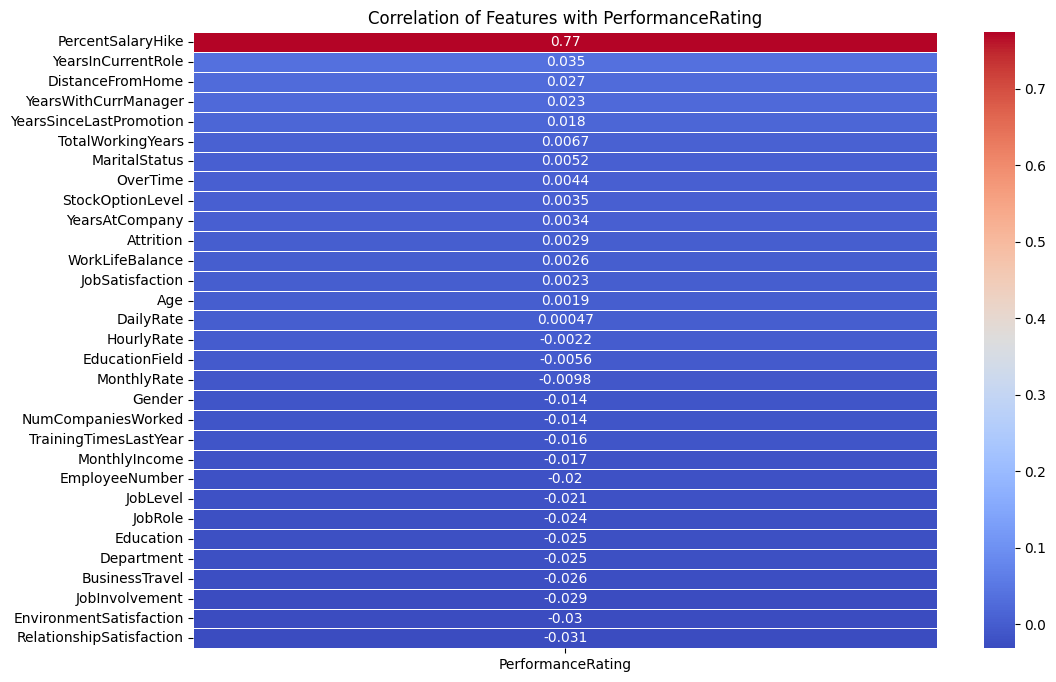

In [22]:
correlations = df_e.corr()['PerformanceRating'].drop('PerformanceRating').sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with PerformanceRating')
plt.show()

Gender                      0.033252
DailyRate                   0.030571
OverTime                    0.024539
MaritalStatus               0.024360
Department                  0.021001
PercentSalaryHike           0.020002
JobRole                     0.017537
StockOptionLevel            0.010690
PerformanceRating           0.002297
MonthlyRate                 0.000644
JobLevel                   -0.001944
YearsInCurrentRole         -0.002305
DistanceFromHome           -0.003669
YearsAtCompany             -0.003803
Age                        -0.004892
TrainingTimesLastYear      -0.005779
EnvironmentSatisfaction    -0.006784
MonthlyIncome              -0.007157
Education                  -0.011296
RelationshipSatisfaction   -0.012454
YearsSinceLastPromotion    -0.018214
WorkLifeBalance            -0.019459
TotalWorkingYears          -0.020185
JobInvolvement             -0.021476
YearsWithCurrManager       -0.027656
BusinessTravel             -0.033962
EducationField             -0.034401
E

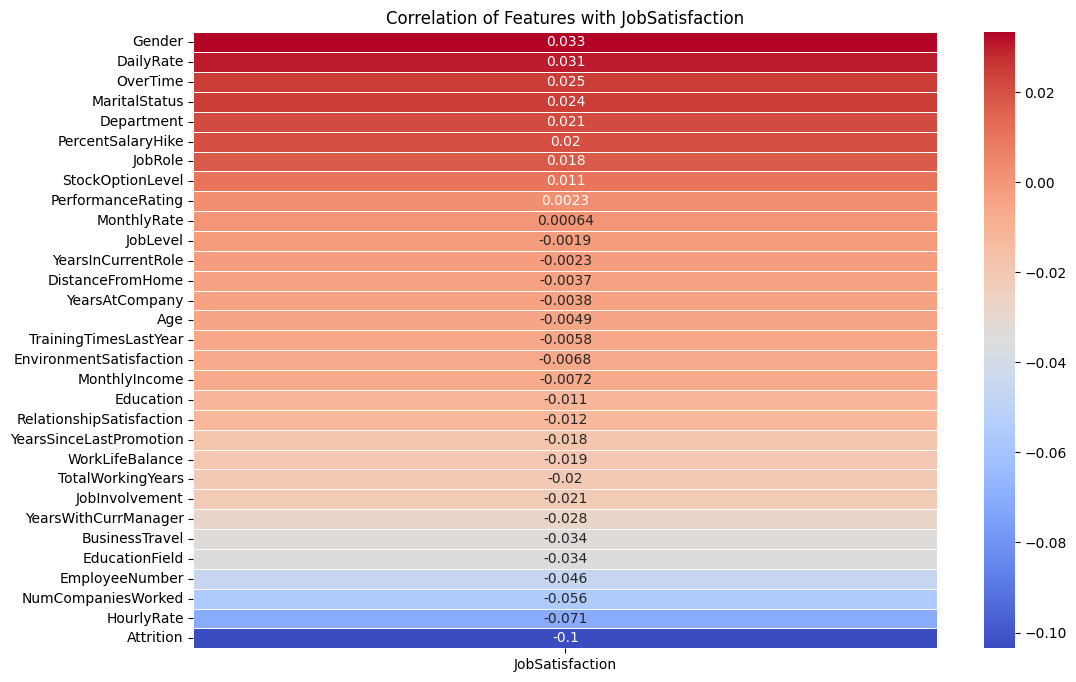

In [23]:
correlations = df_e.corr()['JobSatisfaction'].drop('JobSatisfaction').sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with JobSatisfaction')
plt.show()

So the only correlation, at least that we can see for now, is with salary hike
which was caused by high performance...

While analyzing the data, it becomes apparent that developing concrete strategies to reduce attrition is challenging due to the lack of at least moderate correlations with attrition. Although two weak correlations—Overtime and Marital Status—were identified, actionable strategies based on these factors would likely require trade-offs that may not be feasible.

However, for the sake of exploration (assuming the lack of stronger correlations is due to the synthetic nature of the dataset rather than oversight), we can consider Job Satisfaction as a potential influencing factor. Upon closer examination, two job roles stand out for their notably low satisfaction levels:

1. Human Resources (HR)
2. Research & Development - Manager
In this scenario, we could propose targeted strategies aimed at improving job satisfaction for these specific roles. However, meaningful intervention would still require additional insights into what drives satisfaction or dissatisfaction in these positions—something that isn't clearly reflected in the current dataset.

